# *GalScal* demo notebook

## Introduction
This notebook provides a demo of the package `galscal`.

## Getting started
[...]

In [1]:
!pip3 install numpy
!pip3 install scipy
!pip3 install matplotlib
!pip3 install IPython

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [2]:
import os
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from IPython.display import Audio

In [3]:
import sys
sys.path.append("src")
import galscal

### The signal classes `galscal.Signal` and `galscal.GalSignal`
[...]

In [4]:
PITCH_IN_HZ = 6.
omega = complex(0., 2 * np.pi * PITCH_IN_HZ)

print("Our complex frequency \u03C9:", omega)

Our complex frequency ω: 37.69911184307752j


In [5]:
SAVE_PATH = 'example_signal'
TIME_INTERVAL = (2., 3.)

example_signal = galscal.Signal(omega)
print("Example GalScal `Signal` object:", example_signal)

example_signal.save_wav(SAVE_PATH, TIME_INTERVAL)

Example GalScal `Signal` object: <galscal.signal.Signal object at 0x7fe6e8775970>
Signal over time interval [2.0, 3.0] saved as '/Users/foster/Desktop/Music_Work/Galois_actions/galscal/example_signal.wav'.


Signal sample rate: 44100


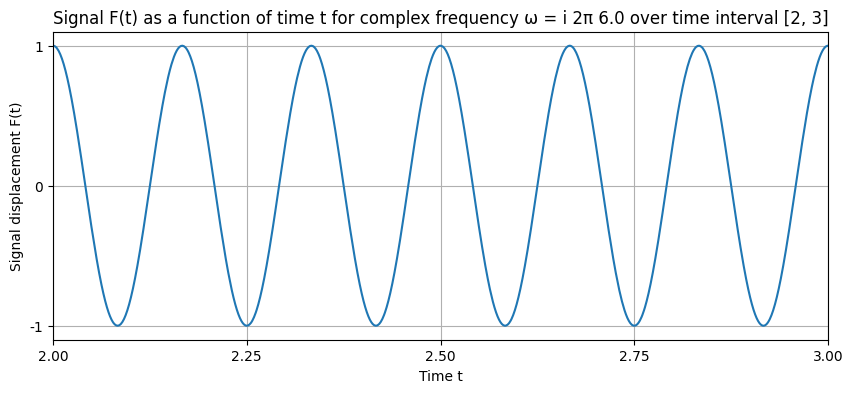

In [6]:
sample_rate, saved_wav = wavfile.read(SAVE_PATH)
print("Signal sample rate:", sample_rate)

normalized_wav = saved_wav / np.iinfo(np.int16).max
sampled_time = np.linspace(TIME_INTERVAL[0], TIME_INTERVAL[1], num=saved_wav.shape[0])

plt.figure(figsize=(10, 4))
plt.plot(sampled_time, normalized_wav)
plt.title('Signal F(t) as a function of time t for complex frequency \u03C9 = i 2\u03C0 ' + str(PITCH_IN_HZ) + ' over time interval [2, 3]')
plt.xlabel('Time t')
plt.ylabel('Signal displacement F(t)')
plt.yticks(ticks=[-1, 0, 1], labels=['-1', '0', '1'])
plt.xlim([TIME_INTERVAL[0], TIME_INTERVAL[1]])
plt.xticks(np.linspace(TIME_INTERVAL[0], TIME_INTERVAL[1], 5))
plt.grid(True)
plt.show()

os.remove(SAVE_PATH)


In [8]:
SAVE_PATH = 'example_signal'
NEW_PITCH_IN_HZ = 440.
new_omega = complex(0., 2 * np.pi * NEW_PITCH_IN_HZ)

new_example_signal = galscal.Signal(new_omega)
new_example_signal.save_wav(SAVE_PATH, TIME_INTERVAL)
print("Our new complex frequency \u03C9:", new_omega)

sample_rate, saved_wav = wavfile.read(SAVE_PATH)
print("Signal sample rate:", sample_rate)

# Normalize the data if it's not already in float format
if saved_wav.dtype == np.int16:
    data = saved_wav / np.iinfo(np.int16).max
elif saved_wav.dtype == np.int32:
    data = saved_wav / np.iinfo(np.int32).max

# Display an audio widget to play sound
Audio(data, rate=sample_rate)

Signal over time interval [2.0, 3.0] saved as '/Users/foster/Desktop/Music_Work/Galois_actions/galscal/example_signal.wav'.
Our new complex frequency ω: 2764.601535159018j
Signal sample rate: 44100
